In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sn
import pandas as pd
import numpy as np

In [2]:
digits = load_digits()

In [3]:
with open('mnist-y.data') as file:
    chars = [line[0] for line in file]

In [4]:
vectors = []
with open('mnist-x.data') as file:
    for line in file:
        vectors.append([1.0 if float(v) == 1 else -1.0 for v in line.strip().split(',')])

<Figure size 640x480 with 0 Axes>

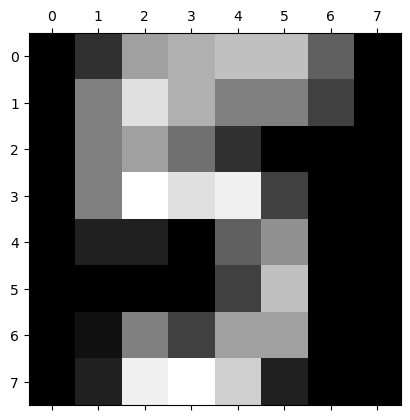

In [5]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1003])
plt.show()

In [6]:
vectors = np.array(vectors)

In [7]:
vectors.shape

(6000, 784)

In [8]:
chars=np.array(chars)

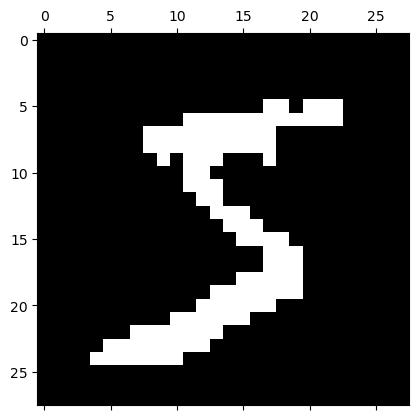

5


In [9]:
plt.matshow(vectors[0].reshape(28,28))
plt.show()
print(chars[0])

# KNN

#### MNIST

In [12]:
X_train, X_test, y_train, y_test = train_test_split(vectors,chars,test_size=0.20, random_state=42)

In [13]:
X_train.shape

(4800, 784)

In [16]:
X_test.shape

(1200, 784)

In [17]:
def predict(Xtrain,train_labels,test_point,k):
    X_train=Xtrain.copy()
    X_train[:,0]=X_train[:,0].astype(float)-test_point[0]
    X_train[:,1]=X_train[:,1].astype(float)-test_point[1]
    distances = np.linalg.norm(X_train[:,[0,1]], axis=1)
    nearest_neighbors = np.argsort(distances)[:k]
    nearest_neighbors=nearest_neighbors.astype(int)
    closets_neigh=train_labels[nearest_neighbors]
    return st.mode(closets_neigh)[0][0]

In [18]:
embedding = PCA(n_components=2)#, normalized_stress='auto')
X_transformed_train = embedding.fit_transform(X_train)
X_transformed_train = np.vstack((X_transformed_train.T, y_train)).T
X_transformed_test = embedding.fit_transform(X_test)
def test(k):
    success = 0
    examples = X_transformed_test[:,[0,1]]
    for e in range(len(examples)):
        z = predict(X_transformed_train,y_train,X_transformed_test[e],k)
        if z == y_test[e]:
            success += 1
    return float(success) / len(examples)

valor_k=[1,2,3,4,5,10,50,100,150,200,500,1000]
yaccuracy_k=[]
for k in valor_k:
    print(k)
    accuracy_k=test(k)
    yaccuracy_k.append(accuracy_k)




1


C:\Users\afrincon\AppData\Local\Temp\ipykernel_13000\2725144360.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return st.mode(closets_neigh)[0][0]
c:\Users\afrincon\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\afrincon\AppData\Local\Temp\ipykernel_13000\2725144360.py:9: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see ht

2
3
4
5
10
50
100
150
200
500
1000


valor de k:  1 , accuracy:  0.3675
valor de k:  2 , accuracy:  0.38
valor de k:  3 , accuracy:  0.3775
valor de k:  4 , accuracy:  0.385
valor de k:  5 , accuracy:  0.39916666666666667
valor de k:  10 , accuracy:  0.43166666666666664
valor de k:  50 , accuracy:  0.44416666666666665
valor de k:  100 , accuracy:  0.4375
valor de k:  150 , accuracy:  0.43916666666666665
valor de k:  200 , accuracy:  0.42833333333333334
valor de k:  500 , accuracy:  0.42583333333333334
valor de k:  1000 , accuracy:  0.4266666666666667


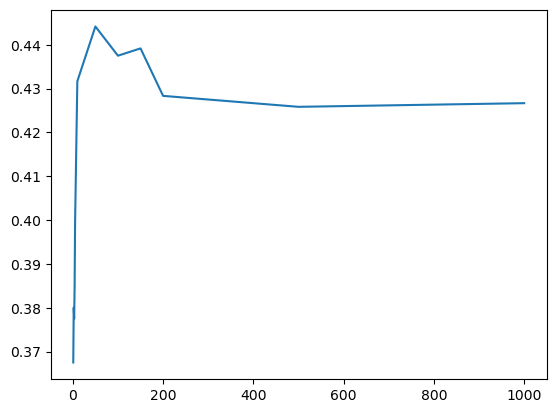

In [28]:
valor_k=np.array([1,2,3,4,5,10,50,100,150,200,500,1000])
for i in range(len(valor_k)):
    print("valor de k: ", valor_k[i], ", accuracy: ", yaccuracy_k[i])
plt.plot(valor_k,yaccuracy_k)
plt.show()

#### DIGITS

In [40]:
digits['data'] = np.where(digits['data']>0,1,-1)

In [41]:
digits["data"].shape

(1797, 64)

In [42]:
digits["target"]

array([0, 1, 2, ..., 8, 9, 8])

In [52]:
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(digits['data'] ,digits["target"],test_size=0.20, random_state=42)

In [55]:

standardized_data_train = MinMaxScaler().fit_transform(X_train_digits)
standardized_data_test = MinMaxScaler().fit_transform(X_test_digits)
#(1797, 64)
embedding = MDS(n_components=2)#, normalized_stress='auto')
X_transformed_train_digits = embedding.fit_transform(standardized_data_train)

X_transformed_train_digits = np.vstack((X_transformed_train_digits.T, y_train_digits)).T
X_transformed_test_digits = embedding.fit_transform(standardized_data_test)

def test(k):
    success = 0
    examples = X_transformed_test_digits[:,[0,1]]
    for e in range(len(examples)):
        z = predict(X_transformed_train_digits,y_train_digits,X_transformed_test_digits[e],k)
        if z == y_test_digits[e]:
            success += 1
    return float(success) / len(examples)

valor_k=[1,2,3,4,5,10,50,100,150,200,500,1000]
yaccuracy_k=[]
for k in valor_k:
    print(k)
    accuracy_k=test(k)
    yaccuracy_k.append(accuracy_k)

1
2
3


C:\Users\afrincon\AppData\Local\Temp\ipykernel_13000\2725144360.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return st.mode(closets_neigh)[0][0]


4
5
10
50
100
150
200
500
1000


valor de k:  1 , accuracy:  0.4361111111111111
valor de k:  2 , accuracy:  0.41944444444444445
valor de k:  3 , accuracy:  0.46111111111111114
valor de k:  4 , accuracy:  0.45555555555555555
valor de k:  5 , accuracy:  0.48333333333333334
valor de k:  10 , accuracy:  0.5083333333333333
valor de k:  50 , accuracy:  0.5305555555555556
valor de k:  100 , accuracy:  0.5194444444444445
valor de k:  150 , accuracy:  0.525
valor de k:  200 , accuracy:  0.5277777777777778
valor de k:  500 , accuracy:  0.35833333333333334
valor de k:  1000 , accuracy:  0.28055555555555556


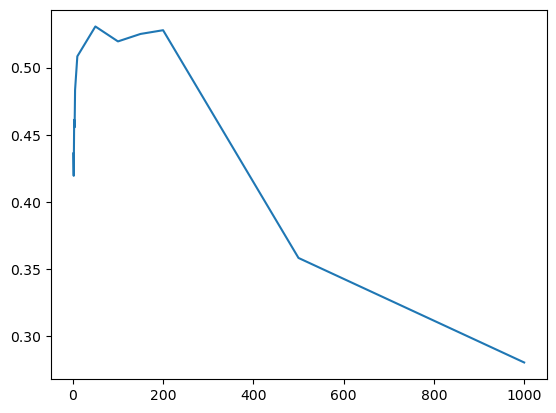

In [56]:
valor_k=np.array([1,2,3,4,5,10,50,100,150,200,500,1000])
for i in range(len(valor_k)):
    print("valor de k: ", valor_k[i], ", accuracy: ", yaccuracy_k[i])
plt.plot(valor_k,yaccuracy_k)
plt.show()

## Prostate

In [40]:
import pandas as pd

In [41]:
prostate_data = pd.read_csv('prostate.csv')
prostate_data

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564
...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509


In [42]:
prostate_data["svi"].value_counts()

0    76
1    21
Name: svi, dtype: int64

In [43]:
#Divide the data set, and apply the K-NN. Test the accuracy, the training error, and the test error.
Prostate_train, Prostate_test = train_test_split(prostate_data,test_size=0.20, random_state=42)

In [44]:
def predict(Xtrain,train_labels,test_point,k):
    X_train=Xtrain.copy()
    for i in range(X_train.shape[1]):
        X_train[:,i]=X_train[:,i].astype(float)-test_point[i]
    distances = np.linalg.norm(X_train, axis=1)
    nearest_neighbors = np.argsort(distances)[:k]
    nearest_neighbors=nearest_neighbors.astype(int)
    closets_neigh=train_labels[nearest_neighbors]
    return st.mode(closets_neigh)[0][0]

In [45]:
X_train_label=Prostate_train["svi"]
X_train=Prostate_train.drop(columns=["svi"])
X_test_label=Prostate_test["svi"]
X_test=Prostate_test.drop(columns=["svi"])


In [46]:
def test(k):
    success = 0
    examples = X_test.values
    for e in range(len(examples)):
        z = predict(X_train.values,X_train_label.values,X_test.values[e],k)
        if z == X_test_label.values[e]:
            success += 1
    return float(success) / len(examples)

valor_k=np.arange(1,97,1)
yaccuracy_k=[]
for k in valor_k:
    accuracy_k=test(k)
    yaccuracy_k.append(accuracy_k)

C:\Users\afrincon\AppData\Local\Temp\ipykernel_13828\2953966927.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return st.mode(closets_neigh)[0][0]


valor de k:  1 , accuracy:  0.7
valor de k:  2 , accuracy:  0.75
valor de k:  3 , accuracy:  0.75
valor de k:  4 , accuracy:  0.7
valor de k:  5 , accuracy:  0.65
valor de k:  6 , accuracy:  0.7
valor de k:  7 , accuracy:  0.75
valor de k:  8 , accuracy:  0.7
valor de k:  9 , accuracy:  0.65
valor de k:  10 , accuracy:  0.7
valor de k:  11 , accuracy:  0.7
valor de k:  12 , accuracy:  0.7
valor de k:  13 , accuracy:  0.7
valor de k:  14 , accuracy:  0.8
valor de k:  15 , accuracy:  0.8
valor de k:  16 , accuracy:  0.8
valor de k:  17 , accuracy:  0.8
valor de k:  18 , accuracy:  0.8
valor de k:  19 , accuracy:  0.8
valor de k:  20 , accuracy:  0.8
valor de k:  21 , accuracy:  0.65
valor de k:  22 , accuracy:  0.8
valor de k:  23 , accuracy:  0.8
valor de k:  24 , accuracy:  0.8
valor de k:  25 , accuracy:  0.9
valor de k:  26 , accuracy:  0.85
valor de k:  27 , accuracy:  0.75
valor de k:  28 , accuracy:  0.8
valor de k:  29 , accuracy:  0.75
valor de k:  30 , accuracy:  0.8
valor de k

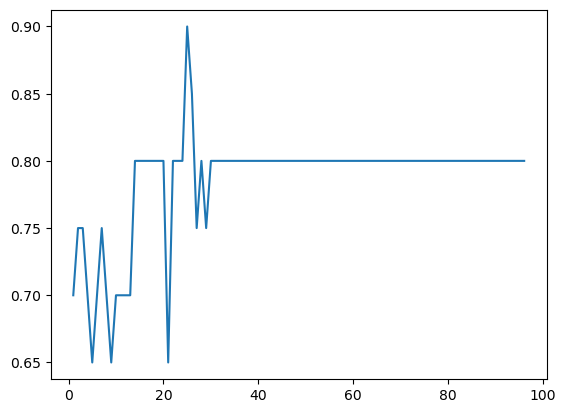

In [47]:

for i in range(len(valor_k)):
    print("valor de k: ", valor_k[i], ", accuracy: ", yaccuracy_k[i])
plt.plot(valor_k,yaccuracy_k)
plt.show()

# Perceptron

In [48]:
data = [{'vector': v, 'char': c} for (v, c) in zip(vectors, chars)]

NameError: name 'vectors' is not defined

In [ ]:
def train(target_char, opposite_char, steps):
    train_data = data[:5000]
    train_data = [e for e in train_data if e['char'] in (target_char, opposite_char)]
    w = np.zeros(784)
    i = 0
    weights = w
    # Implement perceptron, remember:
    if z >= 0 and y == opposite_char:
        #TODO
    elif z < 0 and y == target_char:
        #TODO
    return w

def error(target_char, opposite_char,data,w):
    success = 0
    for e in data:
        z = np.dot(e['vector'], w)
        if (z >= 0 and e['char'] == target_char) or (z < 0 and e['char'] == opposite_char):
            success += 1
    return float(success) / len(data)

def test(target_char, opposite_char,weights):
    success = 0
    examples = data[5000:]

    examples = [e for e in examples if e['char'] in (target_char, opposite_char)]

    for e in examples:
        z = np.dot(e['vector'], weights)
        if (z >= 0 and e['char'] == target_char) or (z < 0 and e['char'] == opposite_char):
            success += 1

    return float(success) / len(examples)

IndentationError: expected an indented block (2579002564.py, line 10)

In [ ]:
weights = train('1','2',100)

In [ ]:
test('1','2',weights)